# Импорт data, предобработка данных

## Импорт

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
y_train = train.SalePrice
train.drop('SalePrice', axis=1, inplace=True)

In [5]:
train['is_test'] = 0
test['is_test'] = 1

In [6]:
train = pd.concat([train, test])

In [7]:
train.drop( ['Id', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
          'Exterior2nd', 'Condition2', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2','BsmtUnfSF', 'LowQualFinSF',
          'GrLivArea', 'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
          'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'Street'], axis=1, inplace = True)

In [8]:
train.OverallQual = train.OverallCond * train.OverallQual
train.drop('OverallCond', axis=1, inplace = True)
train.ExterCond = train.ExterCond.replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po' ], value=[5, 4, 2, 1, 0])
train.ExterQual = train.ExterQual.replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po' ], value=[5, 4, 2, 1, 0])
train.ExterQual = train.ExterCond * train.ExterQual
train.drop('ExterCond', axis=1, inplace = True)

In [9]:
train['IsRemod'] = train.apply(lambda row: row['YearBuilt'] - row['YearRemodAdd'] < 0, axis = 1)
train.drop('YearRemodAdd', axis=1, inplace = True)

In [10]:
train.YearBuilt = 2010 - train.YearBuilt

In [11]:
train.MasVnrType = train.MasVnrType.fillna('None')
train.BsmtQual = train.BsmtQual.fillna('Po')
train.BsmtCond = train.BsmtCond.fillna('Po')
train.Electrical = train.Electrical.fillna('SBrkr')

In [12]:
train.BsmtCond = train.BsmtCond.replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po' ], value=[5, 4, 2, 1, 0])
train.BsmtQual = train.BsmtQual.replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po' ], value=[5, 4, 2, 1, 0])
train.BsmtQual = train.BsmtQual * train.BsmtCond
train.drop('BsmtCond', axis=1, inplace = True)

In [13]:
train.CentralAir = train.CentralAir.replace(to_replace=['Y', 'N'], value = [1, 0])

In [14]:
train.HeatingQC = train.HeatingQC.replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po' ], value=[5, 4, 2, 1, 0])
train.KitchenQual = train.KitchenQual.replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po' ], value=[5, 4, 2, 1, 0])
train.FireplaceQu.fillna('TA')
train.FireplaceQu = train.FireplaceQu.replace(to_replace=['Ex', 'Gd', 'TA', 'Fa', 'Po' ], value=[7, 4, 2, 1, 0])
train.Fireplaces = train.Fireplaces * train.FireplaceQu
train.drop('FireplaceQu', axis=1, inplace = True)

In [15]:
train['duration'] = (2010 - train.YrSold)

In [16]:
train.LotFrontage = train.LotFrontage.fillna(0)
train.MasVnrArea = train.MasVnrArea.fillna(0)
train.BsmtExposure = train.BsmtExposure.fillna('No')
train.Fireplaces = train.Fireplaces.fillna(0)
train.BsmtFullBath = train.BsmtFullBath.fillna(0)
train.GarageArea = train.GarageArea.fillna(0)
train.KitchenQual = train.KitchenQual.fillna(0)
train.MSZoning = train.MSZoning.fillna('RL')
# train.SaleType = train.SaleType.fillna('WD')
train.TotalBsmtSF = train.TotalBsmtSF.fillna(0)
train.BsmtHalfBath = train.BsmtHalfBath.fillna(0)

In [17]:
train['Shape'] = train.apply(lambda x: x['LotShape'] != 'Reg', axis = 1)
train.drop('LotShape', axis=1, inplace = True)

In [18]:
df_dummies = pd.get_dummies(train, columns=['MSSubClass', 'MSZoning', 'Neighborhood', 'Condition1', 
                                            'BldgType', 'HouseStyle', 'MasVnrType', 'Foundation', 
                                            'BsmtExposure', 'Heating', 'Electrical', 'PavedDrive',
                                            'SaleType', 'SaleCondition'])


In [19]:
df_d = df_dummies.copy()


In [20]:
X_train = df_d[df_d.is_test==0].drop('is_test', axis=1)
X_test = df_d[df_d.is_test==1].drop('is_test', axis=1)

In [21]:
X_train.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,CentralAir,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,35,7,196.0,8,8,856.0,5,1,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,48,34,0.0,4,8,1262.0,5,1,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,35,9,162.0,8,8,920.0,5,1,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,35,95,0.0,4,8,756.0,4,1,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,40,10,350.0,8,8,1145.0,5,1,...,0,0,0,1,0,0,0,0,1,0


In [22]:
X_train.to_csv('X_train_for_lr.csv', sep='\t')
X_test.to_csv('X_test_for_lr.csv', sep='\t')
y_train.to_csv('y_train_for_lr.csv', sep='\t')

## Нормировка значений

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
columns = X_train.columns

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=columns)

Выделение отложенной выборки для проверки точности моделей (20% от train)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_tr, X_te, Y_tr, Y_te = train_test_split(X_train_scaled, y_train, test_size = 0.2)

## Обучение бустинга

In [28]:
import xgboost as xgb

In [29]:
params = {'n_estimators': 100,
          'learning_rate': 0.1,
          'max_depth': 3,
          'min_child_weight': 1,
          'subsample': 1,
          'colsample_bytree': 1,
          'n_jobs': 4,
         'objective':"reg:linear"}

In [30]:
reg_xgb = xgb.XGBRegressor(**params)

In [31]:
reg_xgb.fit(X_tr, Y_tr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [32]:
reg_xgb.score(X_te, Y_te)

0.6478817146766345

Собственную метрику вставить не получилось, как не пытался

In [33]:
# from sklearn.metrics import mean_squared_log_error
# def kappa(y_true, y_pred):
#     return 'kappa', mean_squared_log_error(y_true, y_pred)**(1/2)
# reg_xgb.fit(X_tr, Y_tr, eval_metric='kappa', eval_set=[[X_tr, Y_tr], [X_te, Y_te]])

In [34]:
reg_xgb.fit(X_tr, Y_tr, eval_set=[[X_tr, Y_tr], [X_te, Y_te]])

[0]	validation_0-rmse:179580	validation_1-rmse:177145
[1]	validation_0-rmse:162989	validation_1-rmse:160753
[2]	validation_0-rmse:147903	validation_1-rmse:145965
[3]	validation_0-rmse:134333	validation_1-rmse:132513
[4]	validation_0-rmse:122085	validation_1-rmse:120408
[5]	validation_0-rmse:111091	validation_1-rmse:109798
[6]	validation_0-rmse:101283	validation_1-rmse:100267
[7]	validation_0-rmse:92438.8	validation_1-rmse:91716.1
[8]	validation_0-rmse:84525.6	validation_1-rmse:84286.4
[9]	validation_0-rmse:77402.5	validation_1-rmse:77661.3
[10]	validation_0-rmse:70985.9	validation_1-rmse:71929.1
[11]	validation_0-rmse:65286.7	validation_1-rmse:66976.2
[12]	validation_0-rmse:60149.4	validation_1-rmse:62768
[13]	validation_0-rmse:55528.7	validation_1-rmse:59049
[14]	validation_0-rmse:51471.7	validation_1-rmse:56216.8
[15]	validation_0-rmse:47821.8	validation_1-rmse:53574.2
[16]	validation_0-rmse:44558.6	validation_1-rmse:51200.6
[17]	validation_0-rmse:41574.6	validation_1-rmse:49225.8
[1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

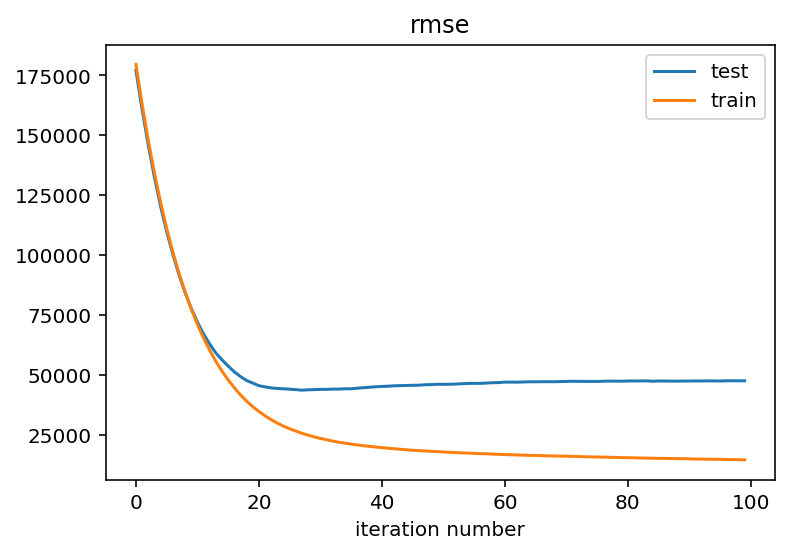

In [74]:
def save_online_metric(model):
    return pd.DataFrame({'train': model.evals_result()['validation_0']['rmse'],
                         'test': model.evals_result()['validation_1']['rmse']})
res = save_online_metric(reg_xgb)
res.plot(title='rmse')
plt.xlabel('iteration number')
plt.figure()

### Подберем параметры с помощью hyperopt

In [35]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [36]:
from sklearn.metrics import mean_squared_log_error
def rmle(y_true, y_pred):
    return mean_squared_log_error(y_true, y_pred)**(1/2)

In [50]:
def score(params):
    params['max_depth'] = int(params['max_depth'])
    params['n_jobs'] = -1
    print("Training with params : ", params)
    reg_xgb = xgb.XGBRegressor(**params)
    reg_xgb.fit(X_tr, Y_tr)
    y_pred_xgb = reg_xgb.predict(X_te)
    error = rmle(Y_te, y_pred_xgb)
    result = {'loss': error,'status': STATUS_OK}  
    print('TEST error: {0:.4f}'.format(error))
    return result



space = {'max_depth' : hp.quniform('max_depth', 1, 15, 1),
         'min_child_weight' : hp.quniform('min_child_weight', 1, 20, 1),
         'subsample' : hp.quniform('subsample', 0.5, 1, 0.05),
         'gamma' : hp.quniform('gamma', 0.5, 1, 0.05),
         'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.05),
         'silent' : 1,
         'n_estimators': 500,
         'learning_rate': 0.03
         }
trials = Trials()

best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=20)

Training with params :  {'colsample_bytree': 0.6000000000000001, 'gamma': 0.9, 'learning_rate': 0.03, 'max_depth': 13, 'min_child_weight': 12.0, 'n_estimators': 500, 'silent': 1, 'subsample': 0.9500000000000001, 'n_jobs': -1}
TEST error: 0.1712
Training with params :  {'colsample_bytree': 0.8, 'gamma': 1.0, 'learning_rate': 0.03, 'max_depth': 14, 'min_child_weight': 7.0, 'n_estimators': 500, 'silent': 1, 'subsample': 0.5, 'n_jobs': -1}
TEST error: 0.1715
Training with params :  {'colsample_bytree': 0.65, 'gamma': 1.0, 'learning_rate': 0.03, 'max_depth': 14, 'min_child_weight': 20.0, 'n_estimators': 500, 'silent': 1, 'subsample': 0.75, 'n_jobs': -1}
TEST error: 0.1703
Training with params :  {'colsample_bytree': 0.8500000000000001, 'gamma': 0.65, 'learning_rate': 0.03, 'max_depth': 1, 'min_child_weight': 10.0, 'n_estimators': 500, 'silent': 1, 'subsample': 0.55, 'n_jobs': -1}
TEST error: 0.1837
Training with params :  {'colsample_bytree': 0.8, 'gamma': 0.7000000000000001, 'learning_rate

In [51]:
best

{'colsample_bytree': 0.65,
 'gamma': 0.9,
 'max_depth': 5.0,
 'min_child_weight': 14.0,
 'subsample': 0.55}

### Проанализируем признаки и их зависимости

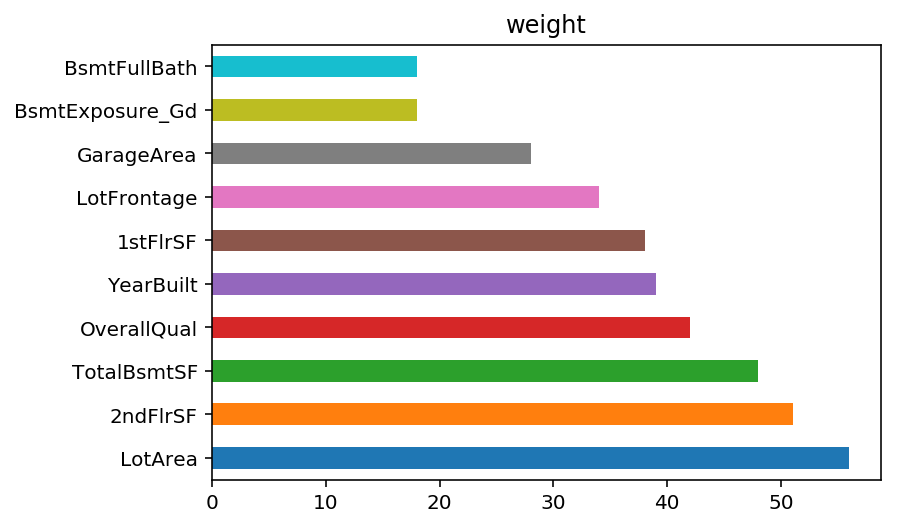

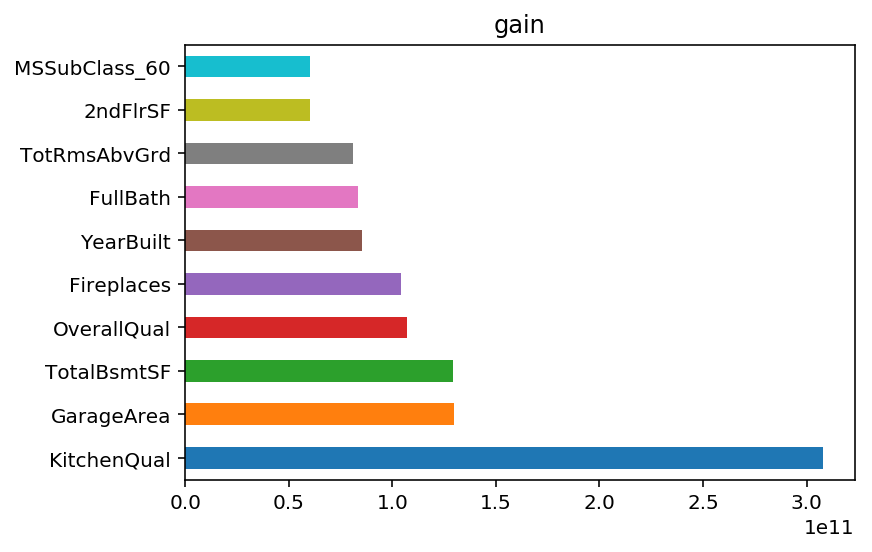

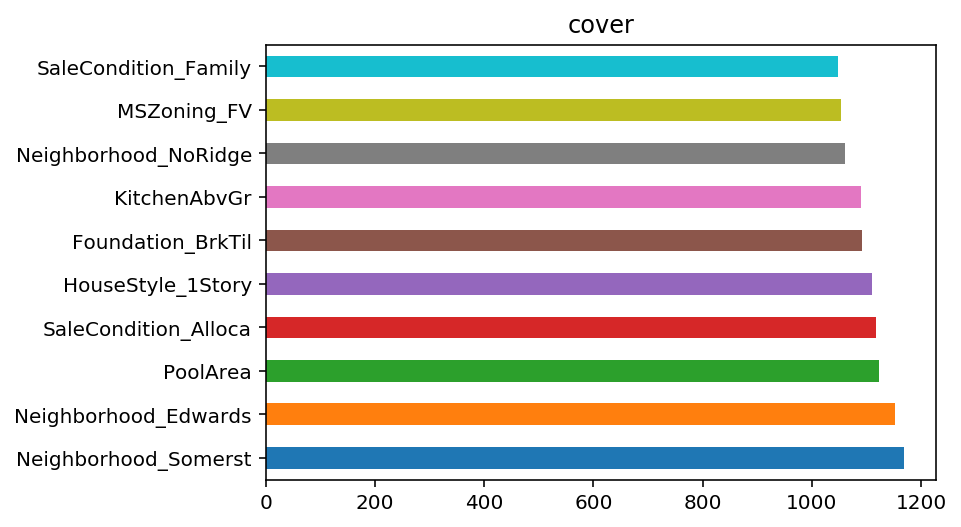

In [53]:
bst = reg_xgb.get_booster()

for kind in ['weight', 'gain', 'cover']:
    imp = pd.Series(bst.get_score(importance_type=kind))
    plt.figure()
    imp.sort_values(ascending=False).iloc[:10].plot(kind='barh', title=kind)

In [55]:
import xgbfir
xgbfir.saveXgbFI(reg_xgb, OutputXlsxFile='xgbfi_report.xlsx')

In [56]:
pd.read_excel('xgbfi_report.xlsx', sheetname=1)

C:\Anaconda\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,Interaction,Gain,FScore,wFScore,Average wFScore,Average Gain,Expected Gain,Gain Rank,FScore Rank,wFScore Rank,Avg wFScore Rank,Avg Gain Rank,Expected Gain Rank,Average Rank,Average Tree Index,Average Tree Depth
0,GarageArea|KitchenQual,7802519690000,4,1.227740,0.306935,1.950630e+12,3.398598e+12,1,18,32,60,2,2,19.166667,21.250000,1.250000
1,2ndFlrSF|TotalBsmtSF,7745983900000,11,5.446062,0.495097,7.041804e+11,4.811166e+12,2,2,2,26,9,1,7.000000,10.272727,1.454545
2,OverallQual|TotalBsmtSF,6316100730000,10,3.496575,0.349658,6.316101e+11,1.697367e+12,3,3,6,51,13,5,13.500000,14.100000,1.300000
3,Fireplaces|KitchenQual,4789489000000,2,1.051370,0.525685,2.394744e+12,2.517762e+12,4,49,36,20,1,3,18.833333,0.500000,1.000000
4,1stFlrSF|YearBuilt,3781357370000,4,1.190068,0.297517,9.453393e+11,1.900528e+12,5,19,34,65,6,4,22.166667,29.500000,1.500000
5,OverallQual|YearBuilt,3380551410000,4,2.736301,0.684075,8.451379e+11,1.619389e+12,6,20,7,14,7,6,10.000000,26.250000,1.250000
6,GarageArea|TotalBsmtSF,2801383680000,4,1.494007,0.373502,7.003459e+11,6.658826e+11,7,21,25,46,10,13,20.333333,23.000000,2.000000
7,1stFlrSF|2ndFlrSF,2387213770000,18,7.379281,0.409960,1.326230e+11,7.128533e+11,8,1,1,38,41,11,16.666667,37.888889,1.611111
8,2ndFlrSF|OverallQual,1871075100000,4,1.595890,0.398973,4.677688e+11,7.039233e+11,9,22,21,41,15,12,20.000000,10.750000,1.750000
9,Fireplaces|YearBuilt,1844564340000,4,1.577055,0.394264,4.611411e+11,1.061259e+12,10,23,22,42,16,7,20.000000,27.750000,1.750000


### Сделаем финальное предсказание и посмотрим скоринг на кросс-валидации.

In [75]:
best['max_depth'] = int(best['max_depth'])

In [67]:
for key in best:
    params[key] = best[key]
params

{'colsample_bytree': 0.65,
 'gamma': 0.9,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 14.0,
 'n_estimators': 100,
 'n_jobs': 4,
 'objective': 'reg:linear',
 'subsample': 0.55}

In [68]:
reg_xgb_final = xgb.XGBRegressor(**params)

In [69]:
reg_xgb_final.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.65, gamma=0.9, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=14.0, missing=None,
       n_estimators=100, n_jobs=4, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.55)

In [79]:
from sklearn.model_selection import cross_val_score

In [81]:
np.mean(cross_val_score( xgb.XGBRegressor(**params), X_train_scaled, y_train, cv = 10))

0.8645387339307791

In [70]:
y_pred = reg_xgb_final.predict(X_test_scaled)

In [72]:
# for_sub = pd.read_csv('test.csv')
# df_pred = pd.DataFrame(for_sub.Id, columns = ['Id'])
# df_pred['SalePrice'] = y_pred
# df_pred = df_pred.set_index('Id')
# df_pred.to_csv('submission.csv')

В итоге по заданию:
1. Цены предсказаны
2. +
3. Настройка гиперпараметров сделана с помощью hyperopt
4. Подбор гиперпараметров делался на отложенной выборке, кросс-валидация сделана после подбора всех параметров на всей выборке. К сожлаению, возникли проблемы с метриками - не могу вставить кастомную в процесс обучения XGB и в кросс-валидацию.
5. Из-за разных метрик не могу проследить. И не совсем понимаю, как - ведь мы настраиваем гиперпараметры и считаем метрику на отложенной выборке много раз, а кросс-валидация нужна только для финальной оценки качества. Как их одновременность уловить?
6. Признаки проанализировал
7. +

### На каггле скоринг получился выше, чем на стекинге